# TP 2 : LINEAR REGRESSION

## Yanis Aït El CAdi

In [79]:
# Imports
import sklearn
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import t
from sklearn.preprocessing import StandardScaler
from scipy.stats import norm
from sklearn.linear_model import Ridge, Lasso, ElasticNet
import seaborn as sns

### Question 1.a

In [80]:
from sklearn.datasets import fetch_california_housing

# Load the California housing dataset 
california_housing = fetch_california_housing()

# Access the data and target variables
data = california_housing.data
target = california_housing.target

# Add a column of ones to the feature matrix for the intercept term
X = np.c_[np.ones(data.shape[0]), data]

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.2, random_state=42)

# Normal equation
theta = np.dot(np.dot(np.linalg.inv(np.dot(X_train.T, X_train)), X_train.T), y_train)

# Function predict
def predict(X, theta):
    return np.dot(X, theta)

# Predictions using the estimated coefficients
y_train_pred = predict(X_train, theta)
y_test_pred = predict(X_test, theta)

# Compare with sklearn Linear Regression
sklearn_model = LinearRegression()
sklearn_model.fit(X_train, y_train)
y_train_pred_sklearn = sklearn_model.predict(X_train)
y_test_pred_sklearn = sklearn_model.predict(X_test)

# Function to compute MSE
def compute_mse(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

# Function to compute R2 coefficient
def compute_r2(y_true, y_pred):
    total_variance = np.sum((y_true - np.mean(y_true))**2)
    explained_variance = np.sum((y_pred - np.mean(y_true))**2)
    r2 = explained_variance / total_variance
    return r2

# Compare the results
print("Results for the model using normal equations from the lectures:")
print("MSE (Train):", compute_mse(y_train, y_train_pred))
print("MSE (Test):", compute_mse(y_test, y_test_pred))
print("R2 (Train):", compute_r2(y_train, y_train_pred))
print("R2 (Test):", compute_r2(y_test, y_test_pred))
print("\nResults for the model using sklearn Linear Regression:")
print("MSE (Train):", compute_mse(y_train, y_train_pred_sklearn))
print("MSE (Test):", compute_mse(y_test, y_test_pred_sklearn))
print("R2 (Train):", compute_r2(y_train, y_train_pred_sklearn))
print("R2 (Test):", compute_r2(y_test, y_test_pred_sklearn))

Results for the model using normal equations from the lectures:
MSE (Train): 0.5179331255246699
MSE (Test): 0.555891598695057
R2 (Train): 0.6125511913955907
R2 (Test): 0.640494192926325

Results for the model using sklearn Linear Regression:
MSE (Train): 0.5179331255246699
MSE (Test): 0.5558915986952438
R2 (Train): 0.612551191396696
R2 (Test): 0.6404941929276396


### Question 1.b

$$\hat{\sigma}^2 = \frac{1}{n - p - 1} \sum_{i=1}^{n} (Y_i - \hat{Y}_i)^2$$
$$(\hat{\theta} - \theta^*) \sim \mathcal{N}(0, \hat{\sigma}^2(X^TX)^{-1})$$
$$T_j = \frac{\hat{\theta}_j - \theta^*_j}{\sqrt{\text{diag}((X^T X)^{-1})_j \cdot \hat{\sigma}^2}}$$
$$\left[ \delta^j - t_{1-\frac{\alpha}{2}} \cdot \hat{\sigma} \text{diag}((X^TX)^{-1})^j, \delta^j + t_{1-\frac{\alpha}{2}} \cdot \hat{\sigma} \text{diag}((X^TX)^{-1})^j \right]$$


In [81]:
# Calculate residuals
residuals = y_train - np.dot(X_train, theta)

# Calculate the standard deviation of the residuals
residual_std = np.std(residuals)

# Degrees of freedom
df = X_train.shape[0] - X_train.shape[1]

# T-distribution critical value for a 99% confidence interval
t_value = t.ppf(0.995, df)

# Calculate standard errors for each coefficient
X_train_inv = np.linalg.inv(np.dot(X_train.T, X_train))
se = np.sqrt(np.diagonal(residual_std**2 * X_train_inv))

# Calculate confidence intervals for each coefficient
conf_intervals = np.column_stack((theta - t_value * se, theta + t_value * se))

# Print confidence intervals
print("Confidence Intervals at 99% level for each coefficient:")
for i, (lower, upper) in enumerate(conf_intervals):
    print(f"Coefficient {i}: [{lower}, {upper}]")

Confidence Intervals at 99% level for each coefficient:
Coefficient 0: [-38.89896673494087, -35.14758867658222]
Coefficient 1: [0.4365999823940267, 0.46074983693838917]
Coefficient 2: [0.008450740229247524, 0.010997774806658868]
Coefficient 3: [-0.14032862127333443, -0.10631806438315798]
Coefficient 4: [0.6975222161352389, 0.8687675974500185]
Coefficient 5: [-1.554722392409228e-05, 1.1487982764050378e-05]
Coefficient 6: [-0.004778476736397923, -0.002274160237884742]
Coefficient 7: [-0.4402814322830519, -0.3993035408875983]
Coefficient 8: [-0.4551404161033699, -0.41227571381780087]


### Question 2.a

In [82]:
file_path = "data.csv" 
data_df = pd.read_csv(file_path)

# Extract features (X) and target variable (y)
X = data_df.iloc[:, :-1].values
y = data_df.iloc[:, -1].values

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Standardize the features using StandardScaler
scaler = StandardScaler()

# Fit and transform on the training set
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test set using the scaler fitted on the training set
X_test_scaled = scaler.transform(X_test)

# Create a linear regression model
ols_model = LinearRegression()

# Fit the model on the standardized training set
ols_model.fit(X_train_scaled, y_train)

# Make predictions on the training set
y_train_pred = ols_model.predict(X_train_scaled)

# Make predictions on the test set
y_test_pred = ols_model.predict(X_test_scaled)

# Evaluate the model
train_mse = compute_mse(y_train, y_train_pred)
test_mse = compute_mse(y_test, y_test_pred)

train_r2 = compute_r2(y_train, y_train_pred)
test_r2 = compute_r2(y_test, y_test_pred)

# Display results
print("OLS Model:")
print("Intercept:", ols_model.intercept_)
print("Training MSE:", train_mse)
print("Test MSE:", test_mse)
print("Training R2 Score:", train_r2)
print("Test R2 Score:", test_r2)

OLS Model:
Intercept: 153.1561746114327
Training MSE: 3398.2075557604608
Test MSE: 5005.347496144923
Training R2 Score: 0.8187259370208673
Test R2 Score: 1.0683317891996902


### Question 3

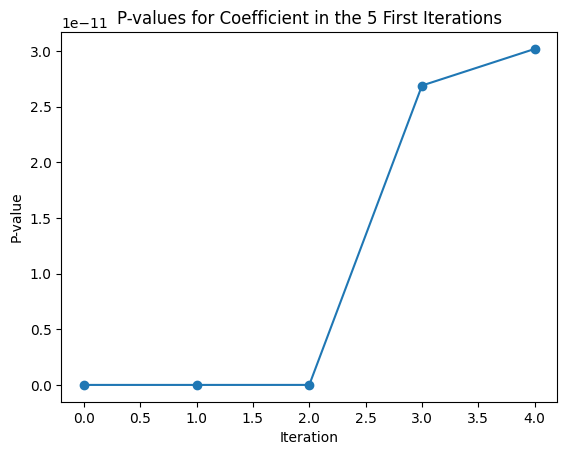

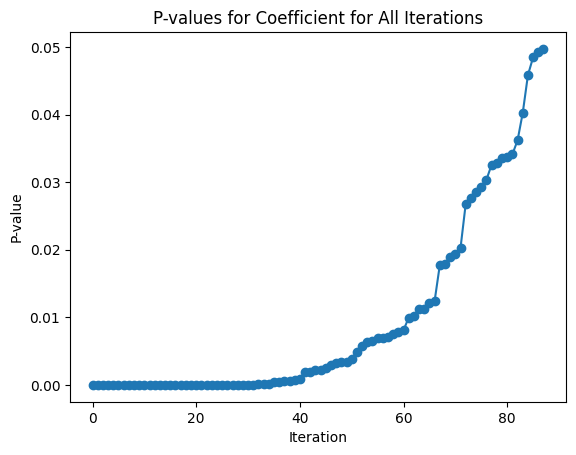

Selected Features: [23, 32, 3, 207, 143, 105, 25, 28, 175, 12, 119, 88, 110, 197, 100, 165, 128, 190, 183, 66, 86, 166, 114, 142, 54, 150, 179, 106, 38, 107, 21, 89, 98, 171, 8, 127, 13, 46, 24, 103, 31, 186, 145, 20, 18, 69, 139, 5, 56, 170, 205, 19, 172, 16, 192, 120, 2, 92, 49, 35, 90, 140, 169, 15, 63, 73, 87, 52, 124, 131, 59, 9, 185, 109, 11, 84, 191, 102, 48, 68, 111, 71, 76, 152, 151, 14, 125, 189]


In [83]:
def no_effect_test(coef, se, n, alpha=0.05):
    """
    Test of no effect for a covariate in linear regression.

    Parameters:
    - coef: Estimated coefficient for the covariate.
    - se: Standard error of the estimated coefficient.
    - n: Sample size.
    - alpha: Significance level for the test (default is 0.05).

    Returns:
    - reject_null: Boolean indicating whether to reject the null hypothesis.
    """
    critical_value = norm.ppf(1 - alpha / 2)

    lower_bound = coef - (se * critical_value / (n**0.5))
    upper_bound = coef + (se * critical_value / (n**0.5))

    reject_null = 0 in [lower_bound, upper_bound]

    return reject_null

def forward_variable_selection(X, y):
    """
    Forward variable selection based on hypothesis tests for regression coefficients.

    Parameters:
    - X: Feature matrix (2D array).
    - y: Target variable vector (1D array).
    - alpha: Significance level for the no effect test (default is 0.05).

    Returns:
    - selected_features: List of selected feature indices.
    - p_values_history: List of p-values for each iteration.
    """

    n, p = X.shape
    selected_features = []  # Set S
    p_values_history = []  # To store p-values for each iteration

    for _ in range(p):
        best_feature_index = None
        min_p_value = np.inf

        # Iterate over remaining features
        for j in range(p):
            if j not in selected_features:
                # Fit a linear regression model using only feature Xj
                X_j = X[:, j].reshape(-1, 1)
                model = LinearRegression().fit(X_j, y)
                
                # Calculate the p-value for the coefficient
                residuals = y - model.predict(X_j)
                mse = np.sum(residuals**2) / (n - 2)  # Mean Squared Error
                sn_k = np.sqrt(mse / np.sum(X_j**2))
                sigma_hat_n = np.sum(residuals**2) / (n - p)
                product_se_sigma_hat = sn_k * np.sqrt(sigma_hat_n)

                if np.isclose(product_se_sigma_hat, 0):
                    current_p_value = np.nan  # Set p-value as NaN
                else:
                    # Check if the covariate has a significant effect
                    if no_effect_test(model.coef_[0], product_se_sigma_hat, n):
                        current_p_value = np.nan  # Set p-value as NaN
                    else:
                        t_stat = model.coef_[0] / np.sqrt(mse / np.sum(X_j**2))
                        current_p_value = 2 * (1 - t.cdf(np.abs(t_stat), df=n-2))

                # Update the feature with the smallest p-value
                if current_p_value < min_p_value:
                    min_p_value = current_p_value
                    best_feature_index = j

        # Halt if the smallest p-value exceeds 0.05 or is NaN
        if np.isnan(min_p_value) or min_p_value > 0.05:
            break

        # Include the best feature in the set S
        selected_features.append(best_feature_index)

        # Subtract residuals from y
        y -= residuals

        # Store p-values for the current iteration
        p_values_history.append(min_p_value)

    return selected_features, p_values_history

# Standardize the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply forward variable selection
selected_features, p_values_history = forward_variable_selection(X_scaled, y)

# Plot p-values for the iterations
plt.plot(p_values_history[:5], marker='o')
plt.title('P-values for Coefficient in the 5 First Iterations')
plt.xlabel('Iteration')
plt.ylabel('P-value')
plt.show()

plt.plot(p_values_history, marker='o')
plt.title('P-values for Coefficient for All Iterations')
plt.xlabel('Iteration')
plt.ylabel('P-value')
plt.show()

# Display the selected features
print("Selected Features:", selected_features)

In this context, the p-value indicates how linked the coefficient is to the target value, the closer it is to 0, the more the coefficient gives us information on the target.

The reason for substracting the residual is to ensure that the link we found between the last best coefficient found and the target value isn't taken into account for the following coefficient.

I only show the minimal p-value in the graphic because I have not found a way to show all of them in a clear and comprehensible way (also we only care about the minimal p-value at each iteration as it is the linked coefficient that we will keep).

### Question 4.a and 4.b

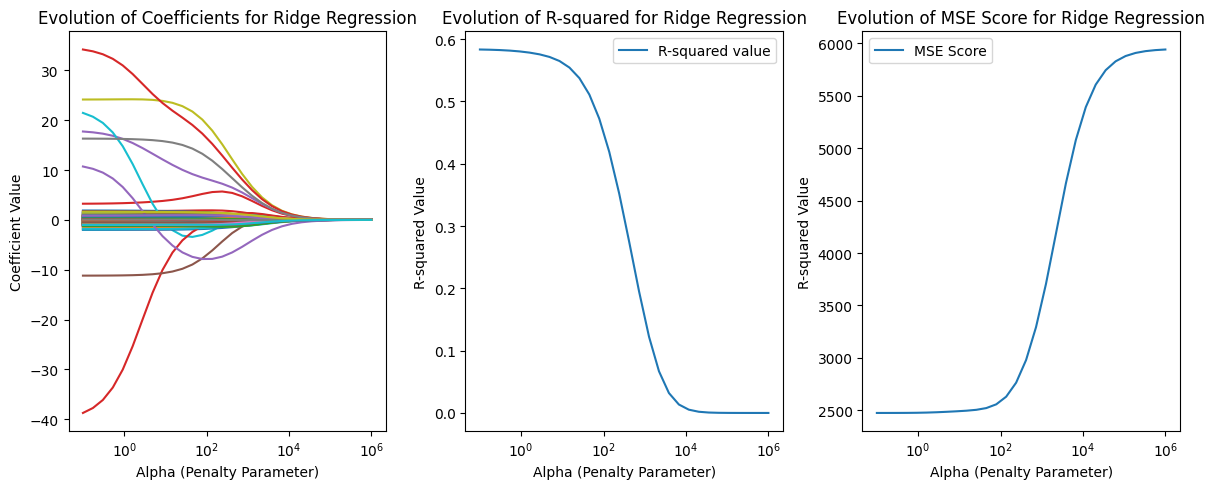

In [84]:
file_path = "data.csv"  
data_df = pd.read_csv(file_path)

# Extract features (X) and target variable (y)
X = data_df.iloc[:, :-1].values
y = data_df.iloc[:, -1].values

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

def regression_analysis(X_train, y_train, model, alpha_lower, alpha_upper, num_iterations):
    """
    Perform Ridge, Lasso, or Elastic Net Regression analysis with varying penalty parameters.

    Parameters:
    - X_train: Feature matrix of the training set.
    - y_train: Target variable vector of the training set.
    - model: Regression model (Ridge, Lasso, or ElasticNet).
    - alpha_lower: Lower bound for alpha (penalty parameter).
    - alpha_upper: Upper bound for alpha (penalty parameter).
    - num_iterations: Number of iterations between alpha_lower and alpha_upper.

    Returns:
    - coefficients_history: List of coefficients for each iteration.
    - r_squared_history: List of R-squared values for each iteration.
    - mse_score_history: List of MSE values for each iteration
    - alpha_values: List of alpha values used in the iterations.
    - regression_model : the regression model after fitting
    """

    alpha_values = np.logspace(np.log10(alpha_lower), np.log10(alpha_upper), num_iterations)

    coefficients_history = []
    r_squared_history = []
    mse_score_history = []

    for alpha in alpha_values:
        # Initialize the specified regression model with the current alpha value
        regression_model = model(alpha=alpha)

        # Fit the regression model
        regression_model.fit(X_train, y_train)

        # Store the coefficients for the current iteration
        coefficients_history.append(regression_model.coef_)

        # Predict on the training set and calculate R-squared
        y_pred = regression_model.predict(X_train)
        r_squared = compute_r2(y_train, y_pred)
        mse_score = compute_mse(y_train, y_pred)
        mse_score_history.append(mse_score)
        r_squared_history.append(r_squared)

    return coefficients_history, r_squared_history,mse_score_history, alpha_values, regression_model

def plot_results(alpha_values, coefficients_history, r_squared_history, mse_history, method_name):
    """
    Plot the results of Ridge, Lasso, or Elastic Net Regression analysis.

    Parameters:
    - alpha_values: List of penalty parameter values.
    - coefficients_history: List of coefficients for each iteration.
    - r_squared_history: List of R-squared values for each iteration.
    - method_name: Name of the regression method for plot titles.
    """

    # Plot the evolution of coefficients
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 3, 1)
    plt.plot(alpha_values, np.array(coefficients_history))
    plt.xscale('log')
    plt.title(f'Evolution of Coefficients for {method_name} Regression')
    plt.xlabel('Alpha (Penalty Parameter)')
    plt.ylabel('Coefficient Value')

    # Plot the evolution of R-squared
    plt.subplot(1, 3, 2)
    plt.plot(alpha_values, r_squared_history, label='R-squared value')
    plt.xscale('log')
    plt.title(f'Evolution of R-squared for {method_name} Regression')
    plt.xlabel('Alpha (Penalty Parameter)')
    plt.ylabel('R-squared Value')
    plt.legend()

    plt.subplot(1, 3, 3)
    plt.plot(alpha_values,mse_history,label = 'MSE Score')
    plt.xscale('log')
    plt.title(f'Evolution of MSE Score for {method_name} Regression')
    plt.xlabel('Alpha (Penalty Parameter)')
    plt.ylabel('R-squared Value')
    plt.legend()

    plt.tight_layout()
    plt.show()


alpha_lower = 1e-1
alpha_upper = 1e6
num_iterations = 30

# Call the regression analysis function for Ridge
ridge_coefficients_history, ridge_r_squared_history,ridge_r_mse_history, ridge_alpha_values, ridge_model = regression_analysis(X_train, y_train, Ridge, alpha_lower, alpha_upper, num_iterations)
plot_results(ridge_alpha_values, ridge_coefficients_history, ridge_r_squared_history,ridge_r_mse_history, 'Ridge')

### Question 5

C:\Users\boite\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.191e+05, tolerance: 1.963e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\boite\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.235e+05, tolerance: 1.963e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\boite\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\loca

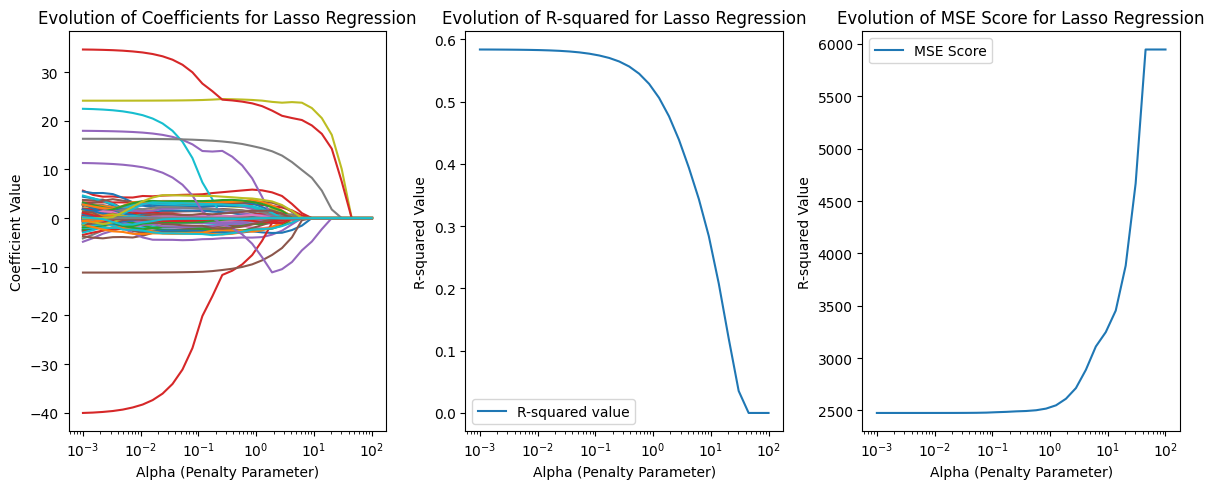

In [85]:
alpha_lower = 1e-3
alpha_upper = 1e2
num_iterations = 30

# Call the regression analysis function for Lasso
lasso_coefficients_history, lasso_r_squared_history,lasso_mse_history, lasso_alpha_values, lasso_model = regression_analysis(X_train, y_train, Lasso, alpha_lower, alpha_upper, num_iterations)
plot_results(lasso_alpha_values, lasso_coefficients_history, lasso_r_squared_history,lasso_mse_history, 'Lasso')

### Question 6

C:\Users\boite\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.797e+05, tolerance: 1.963e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\boite\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.289e+05, tolerance: 1.963e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\boite\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\loca

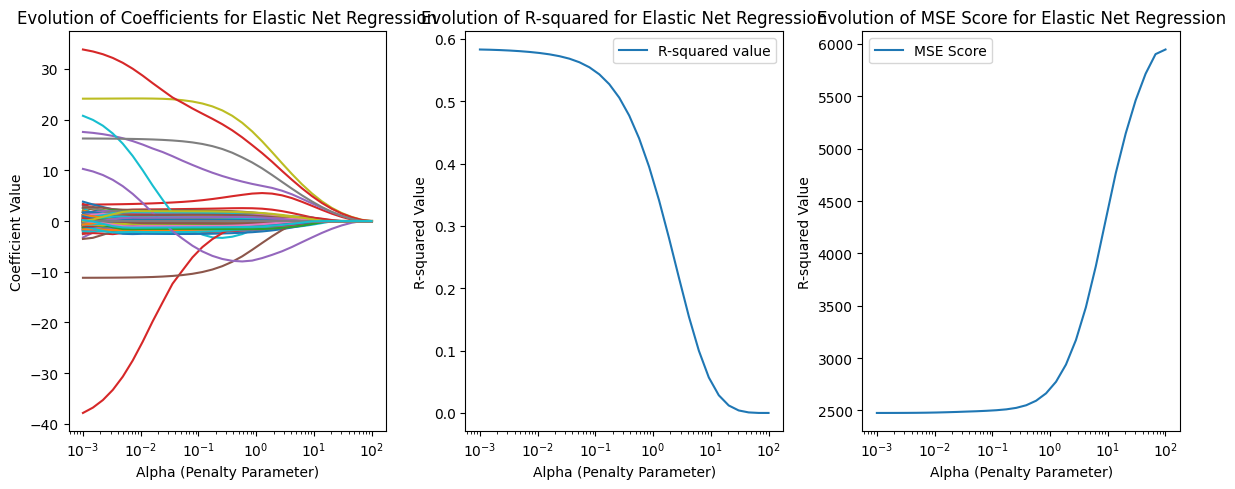

Best alpha for R2: 0.001
Best alpha for MSE: 0.001


In [86]:
alpha_lower = 1e-3
alpha_upper = 1e2
num_iterations = 30

# Call the regression analysis function for Elastic Net
elastic_net_coefficients_history, elastic_net_r_squared_history,elastic_net_mse_history, elastic_net_alpha_values, ENet_model = regression_analysis(X_train, y_train, ElasticNet, alpha_lower, alpha_upper, num_iterations)
plot_results(elastic_net_alpha_values, elastic_net_coefficients_history, elastic_net_r_squared_history,elastic_net_mse_history,  'Elastic Net')

best_alpha_r2_elastic = elastic_net_alpha_values[np.argmax(elastic_net_r_squared_history)]
best_alpha_mse_elastic = elastic_net_alpha_values[np.argmin(elastic_net_mse_history)]
print("Best alpha for R2:", best_alpha_r2_elastic)
print("Best alpha for MSE:", best_alpha_mse_elastic)

### Question 7

In [87]:
# Compute the covariance matrix
cov_matrix = np.cov(X, rowvar=False)

# Compute the Singular Value Decomposition
U, s, Vt = np.linalg.svd(cov_matrix)

# Vt needs to be transposed to get V
V = Vt.T

### Question 7.a

The use of the 'viridis' cmap ensures that the plot is colorblind friendly

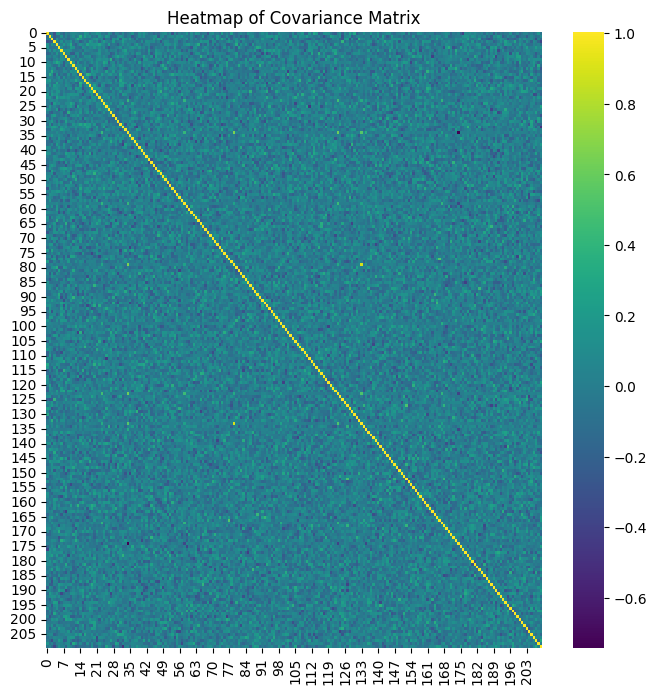

In [88]:
# Compute the covariance matrix
cov_matrix = np.cov(X, rowvar=False)

# Plot a heatmap of the covariance matrix
plt.figure(figsize=(8, 8))
sns.heatmap(cov_matrix,cmap='viridis')
plt.title('Heatmap of Covariance Matrix')
plt.show()

### Question 7.b

In [89]:
# Center the data by subtracting the mean of each feature
X_centered = X - np.mean(X, axis=0)

# Compute the Singular Value Decomposition
U, s, Vt = np.linalg.svd(X_centered)

# Principal components are given by the right singular vectors
principal_components = Vt.T

# Project the data onto the principal components
X_pca = np.dot(X_centered, principal_components)

### Question 7.c

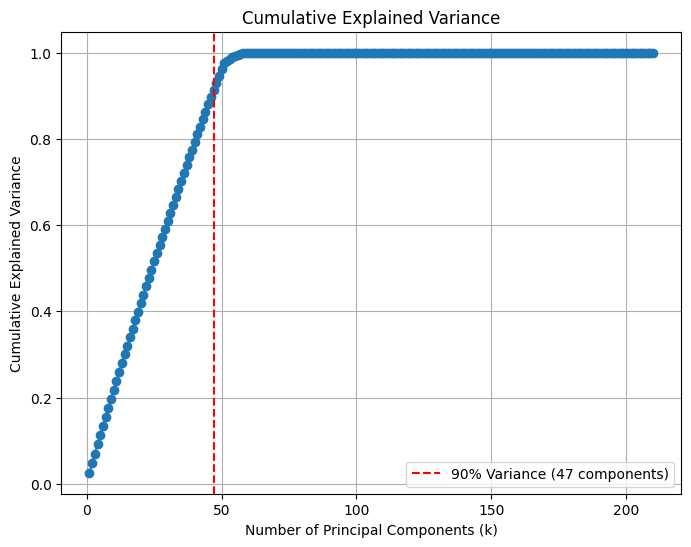

Number of components needed to explain more than 90% of the variance: 47


In [90]:
# Compute the cumulative explained variance
cumulative_explained_variance = np.cumsum(np.square(s)) / np.sum(np.square(s))

# Plot the amount of variance explained by the first k components
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components (k)')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)

# Find the number of components needed to explain more than 90% of the variance
required_components = np.argmax(cumulative_explained_variance > 0.90) + 1
plt.axvline(x=required_components, color='r', linestyle='--', label=f'90% Variance ({required_components} components)')
plt.legend()

plt.show()

print(f'Number of components needed to explain more than 90% of the variance: {required_components}')

### Question 7.d

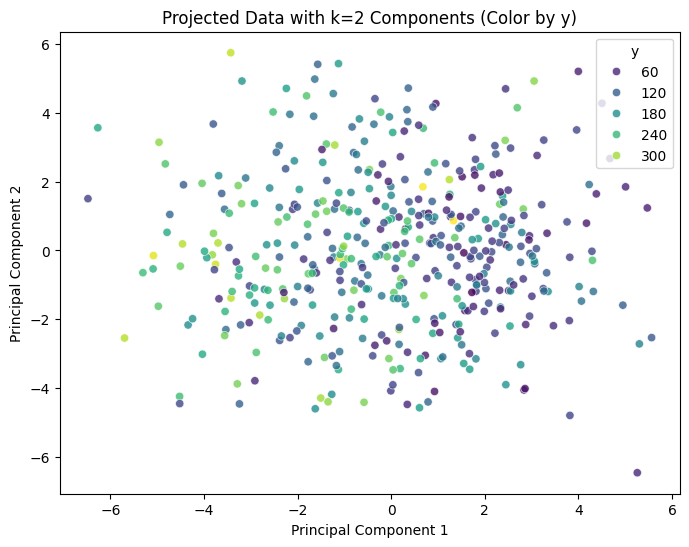

In [91]:
# Select only the first two principal components for visualization
X_pca_2d = X_pca[:, :2]

# Create a scatter plot with colors based on the target variable y
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca_2d[:, 0], y=X_pca_2d[:, 1], hue=y, palette='viridis', alpha=0.8)
plt.title('Projected Data with k=2 Components (Color by y)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='y', loc='upper right')
plt.show()

Clusters or patterns in the plot indicate relationships or separations in the data. If points with similar y values cluster together, it means that the principal components gives information related to the target variable. In our case, it doesn't seem that there are any particular cluster of points that would indicate any strong link.

### Question 7.e

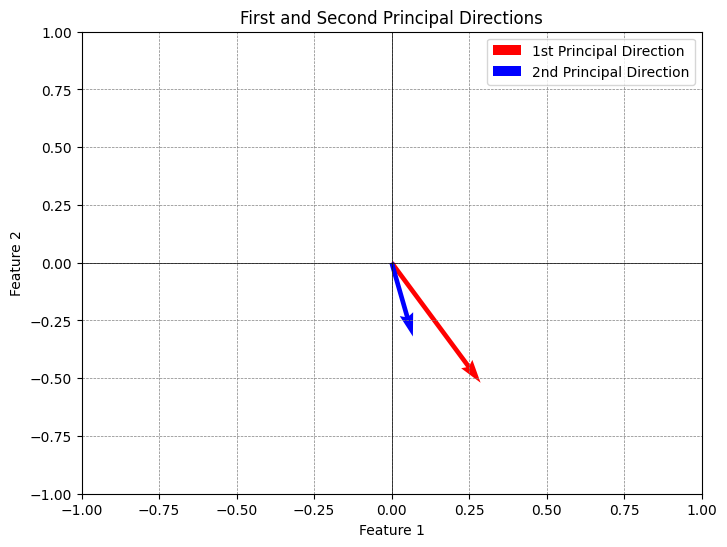

In [92]:
# Extract the first and second principal directions
first_direction = V[:, 0]
second_direction = V[:, 1]

# Plot the first and second principal directions
plt.figure(figsize=(8, 6))
plt.quiver(0, 0, first_direction[0], first_direction[1], angles='xy', scale_units='xy', scale=0.1, color='r', label='1st Principal Direction')
plt.quiver(0, 0, second_direction[0], second_direction[1], angles='xy', scale_units='xy', scale=0.1, color='b', label='2nd Principal Direction')
plt.xlim([-1, 1])
plt.ylim([-1, 1])
plt.title('First and Second Principal Directions')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.legend()
plt.show()

### Question 7.f

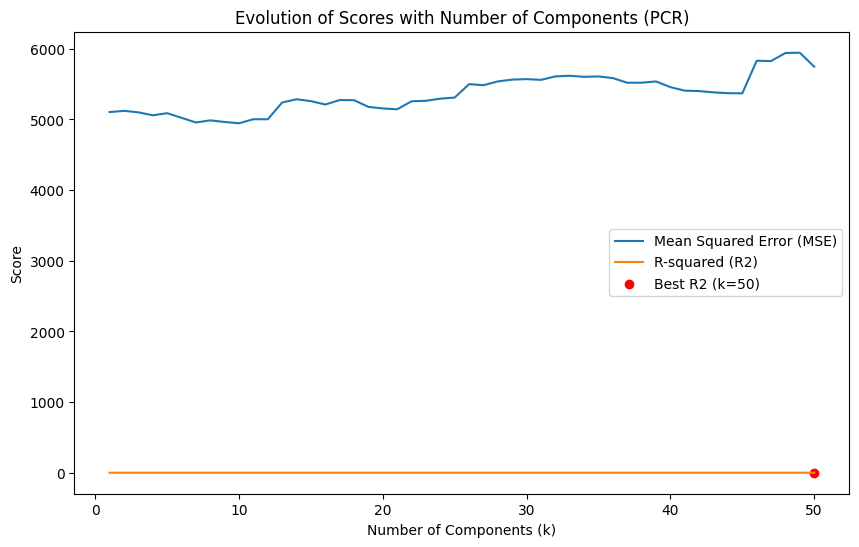

Best number of components for the highest R-squared: 50. The R-squared associated value is 0.


In [93]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Select a range of components (k) for PCR
max_components = 50
components_range = range(1, max_components + 1)

# Initialize lists to store scores
mse_scores = []
r2_scores = []

# Run OLS for different numbers of components
for k in components_range:
    # Use the first k principal components
    X_train_pcr = X_train[:, :k]
    X_test_pcr = X_test[:, :k]

    # Fit OLS model
    model = LinearRegression()
    model.fit(X_train_pcr, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test_pcr)

    # Calculate scores
    mse = compute_mse(y_test, y_pred)
    r2 = compute_r2(y_test, y_pred)

    # Store scores
    mse_scores.append(mse)
    r2_scores.append(r2)

# Find the index of the best score
best_score_index = np.argmax(r2_scores)
best_k = components_range[best_score_index]

# Plot the evolution of scores with k
plt.figure(figsize=(10, 6))
plt.plot(components_range, mse_scores, label='Mean Squared Error (MSE)')
plt.plot(components_range, r2_scores, label='R-squared (R2)')
plt.scatter(best_k, r2_scores[best_score_index], color='red', marker='o', label=f'Best R2 (k={best_k})')
plt.title('Evolution of Scores with Number of Components (PCR)')
plt.xlabel('Number of Components (k)')
plt.ylabel('Score')
plt.legend()
plt.show()

print(f'Best number of components for the highest R-squared: {best_k}. The R-squared associated value is {round(r2_scores[best_k-1])}.')

### Question 8

C:\Users\boite\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.191e+05, tolerance: 1.963e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\boite\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.797e+05, tolerance: 1.963e+02
  model = cd_fast.enet_coordinate_descent(


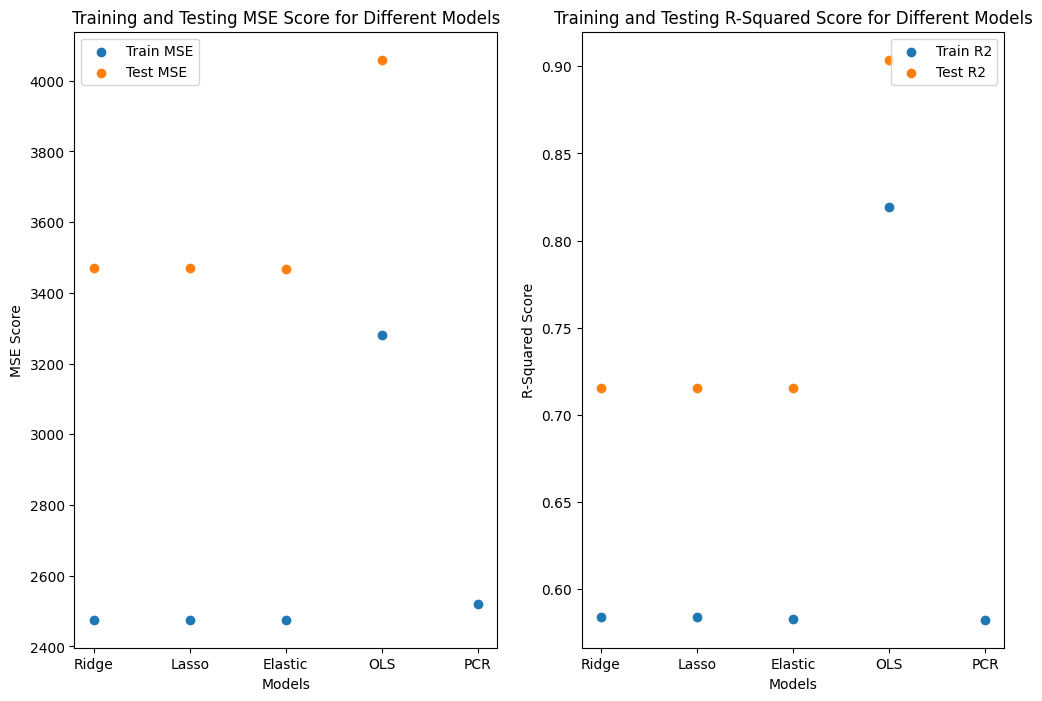

In [94]:
# Load the dataset using pandas
file_path = "data.csv" 
data_df = pd.read_csv(file_path)

# Extract features (X) and target variable (y)
X = data_df.iloc[:, :-1].values
y = data_df.iloc[:, -1].values

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Ridge Regression
ridge_model = Ridge(alpha=0.001)  
ridge_model.fit(X_train, y_train)
ridge_train_pred = ridge_model.predict(X_train)
ridge_test_pred = ridge_model.predict(X_test)

# Lasso Regression
lasso_model = Lasso(alpha=0.001)  
lasso_model.fit(X_train, y_train)
lasso_train_pred = lasso_model.predict(X_train)
lasso_test_pred = lasso_model.predict(X_test)

# Elastic Net
elastic_net_model = ElasticNet(alpha=0.001)
elastic_net_model.fit(X_train, y_train)
elastic_train_pred = elastic_net_model.predict(X_train)
elastic_test_pred = elastic_net_model.predict(X_test)

# Ordinary Least Squares (OLS)
ols_model = LinearRegression()
ols_model.fit(X_train, y_train)
ols_train_pred = ols_model.predict(X_train)
ols_test_pred = ols_model.predict(X_test)

# Principal Component Regression (PCR)
pcr_model = LinearRegression()
pcr_model.fit(X_pca, y)
pcr_train_pred = pcr_model.predict(X_pca)

# Calculate metrics
ridge_train_mse = compute_mse(y_train, ridge_train_pred)
ridge_test_mse = compute_mse(y_test, ridge_test_pred)
ridge_train_r2 = compute_r2(y_train, ridge_train_pred)
ridge_test_r2 = compute_r2(y_test, ridge_test_pred)

lasso_train_mse = compute_mse(y_train, lasso_train_pred)
lasso_test_mse = compute_mse(y_test, lasso_test_pred)
lasso_train_r2 = compute_r2(y_train, lasso_train_pred)
lasso_test_r2 = compute_r2(y_test, lasso_test_pred)

elastic_train_mse = compute_mse(y_train, elastic_train_pred)
elastic_test_mse = compute_mse(y_test, elastic_test_pred)
elastic_train_r2 = compute_r2(y_train, elastic_train_pred)
elastic_test_r2 = compute_r2(y_test, elastic_test_pred)

ols_train_mse = compute_mse(y_train, ols_train_pred)
ols_test_mse = compute_mse(y_test, ols_test_pred)
ols_train_r2 = compute_r2(y_train, ols_train_pred)
ols_test_r2 = compute_r2(y_test, ols_test_pred)

pcr_train_mse = compute_mse(y, pcr_train_pred)  
pcr_train_r2 = compute_r2(y, pcr_train_pred)

# Store metrics
models = ['Ridge', 'Lasso', 'Elastic', 'OLS', 'PCR']
train_mse = [ridge_train_mse, lasso_train_mse,elastic_train_mse, ols_train_mse, pcr_train_mse]
test_mse = [ridge_test_mse, lasso_test_mse,elastic_test_mse, ols_test_mse, None]  
train_r2 = [ridge_train_r2, lasso_train_r2,elastic_train_r2, ols_train_r2, pcr_train_r2]
test_r2 = [ridge_test_r2, lasso_test_r2,elastic_test_r2, ols_test_r2, None]  


# Plot training and testing errors
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.title('Training and Testing MSE Score for Different Models')
plt.scatter(models, train_mse, label='Train MSE', marker='o')
plt.scatter(models, test_mse, label='Test MSE', marker='o')
plt.xlabel('Models')
plt.ylabel('MSE Score')
plt.legend()


plt.subplot(1, 2, 2)
plt.title('Training and Testing R-Squared Score for Different Models')
plt.scatter(models, train_r2, label='Train R2', marker='o')
plt.scatter(models, test_r2, label='Test R2', marker='o')
plt.xlabel('Models')
plt.ylabel('R-Squared Score')
plt.legend()
plt.show()


The Ridge, Lasso and Elastic models have similar results, having a really low MSE Score but not a great R-Squared Score, whereas the OLS has a great R-Squared Score but a poor MSE Score.

**Lasso (L1 Regularization):**
- Penalty Term: L1 norm of the coefficients (absolute values).
- Purpose: Promotes sparsity in the coefficient vector, encouraging some coefficients to be exactly zero.
- Main Characteristics:
     * Can lead to a sparse model by setting some coefficients to exactly zero.
     * Suitable for situations where some features are expected to have no effect on the target.


**Ridge (L2 Regularization):**
- Penalty Term: L2 norm of the coefficients (squared values).
- Purpose: Controls the magnitude of the coefficients, preventing them from becoming too large.
- Main Characteristics:
    * Regularizes the model by shrinking the coefficients towards zero but not to absolute zero.
    * Effective when there is multicollinearity among features.

**Elastic Net:**
- Penalty Term: Combination of both L1 and L2 norms.
- Purpose: Balances the advantages of Lasso and Ridge regularization.
- Main Characteristics:
    * Combines the sparsity-inducing nature of Lasso with the coefficient magnitude control of Ridge.
    * Provides a tuning parameter to control the mix between L1 and L2 regularization.

**Ordinary Least Squares (OLS):**
- Purpose: Minimizes the sum of squared differences between observed and predicted values.
- Main Characteristics:
    * Classic linear regression without regularization.
    * Sensitive to multicollinearity and may lead to overfitting with a large number of features.

**Principal Component Regression (PCR):**
- Purpose: Reduces dimensionality using principal components obtained through Singular Value Decomposition (SVD).
- Main Characteristics:
    * Employs dimensionality reduction through principal components before regression.
    * Reduces multicollinearity by transforming the original features into uncorrelated principal components.